In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
# the following will take a while:
mnist = fetch_openml('mnist_784')
df = mnist.data / 255.0
y = mnist.target
feat_cols = df.columns
df['y'] = y.cat.codes


/home/gia/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [5]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 640x480 with 0 Axes>

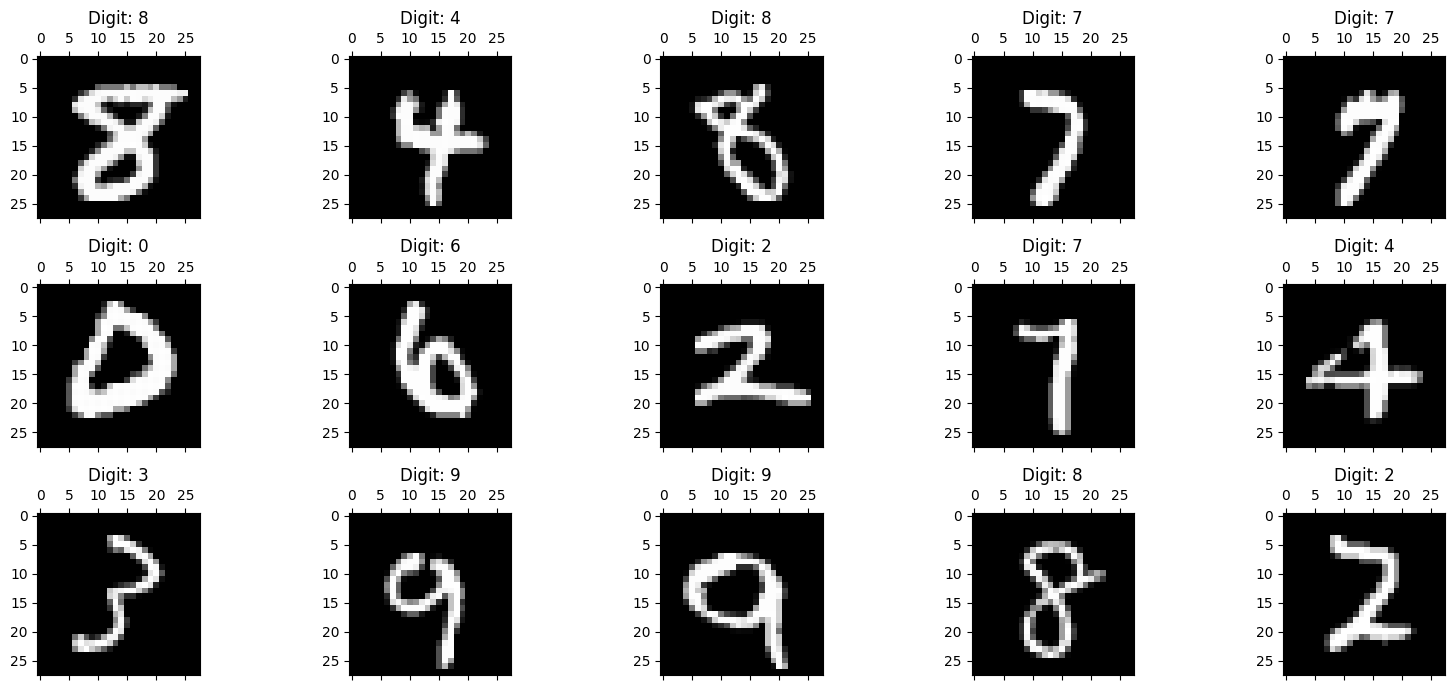

In [6]:
plt.gray()
fig = plt.figure(figsize=(16, 7))

for i in range(0, 15):
    ax = fig.add_subplot(3, 5, i+1, title=f"Digit: {df.loc[rndperm[i],'y']}")
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28, 28)).astype(float))

plt.tight_layout()
plt.show()

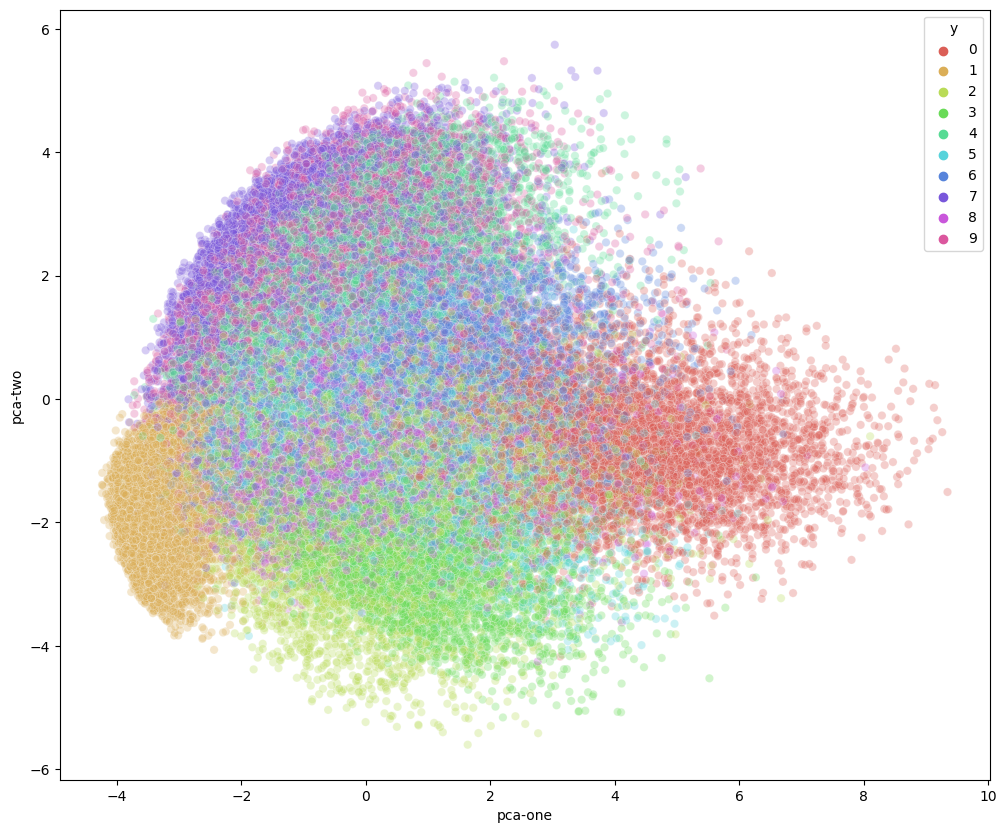

In [8]:
# instantiate a PCA object
pca = PCA(n_components=3)
# compute PCA and transform the data
pca_result = pca.fit_transform(df[feat_cols].values)
# save to dataframe
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1] 
df['pca-three'] = pca_result[:, 2]

plt.figure(figsize=(12, 10))

sns.scatterplot(
    x="pca-one", y="pca-two",
    data=df,
    hue="y",
    palette=sns.color_palette("hls", 10),
    # legend="full",
    alpha=0.3,
)

plt.show()

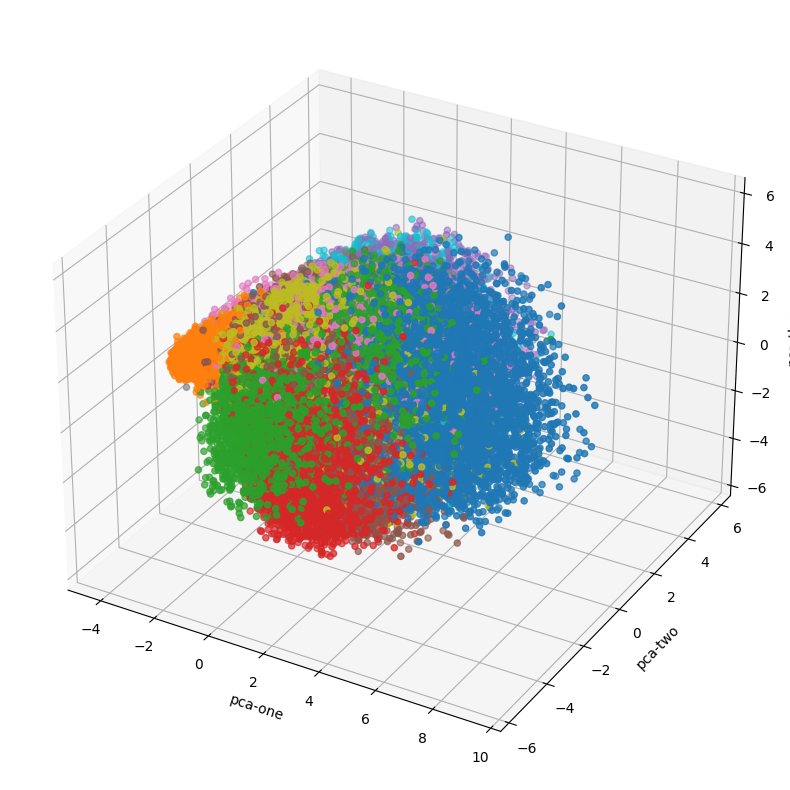

In [9]:
fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"], 
    cmap='tab10'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

In [16]:
N = 1000
df_subset = df.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1] 
df_subset['pca-three'] = pca_result[:, 2]

In [17]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.829524
[t-SNE] KL divergence after 100 iterations with early exaggeration: 66.124435
[t-SNE] KL divergence after 300 iterations: 1.042987
t-SNE done! Time elapsed: 1.1061551570892334 seconds


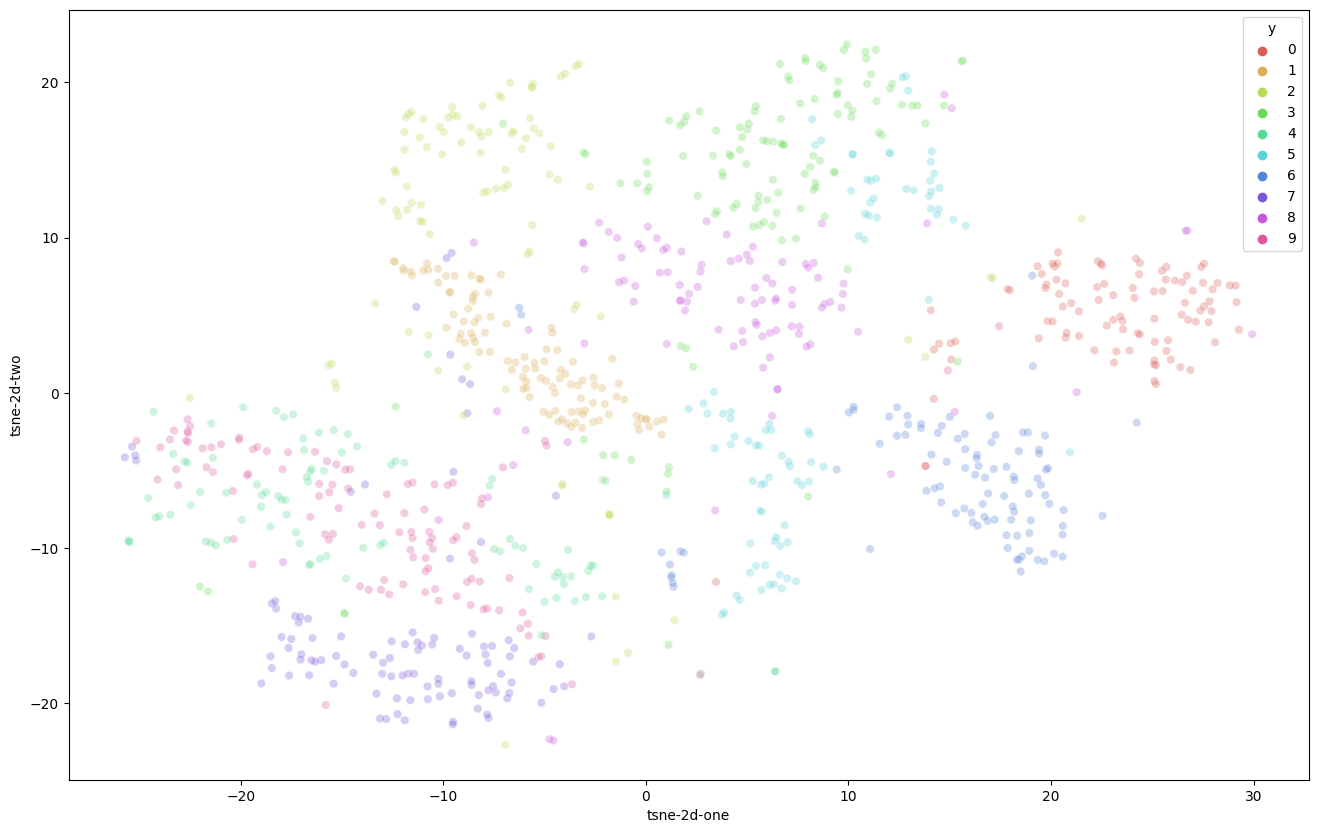

In [18]:
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    # legend="full",
    alpha=0.3,
)

plt.show()

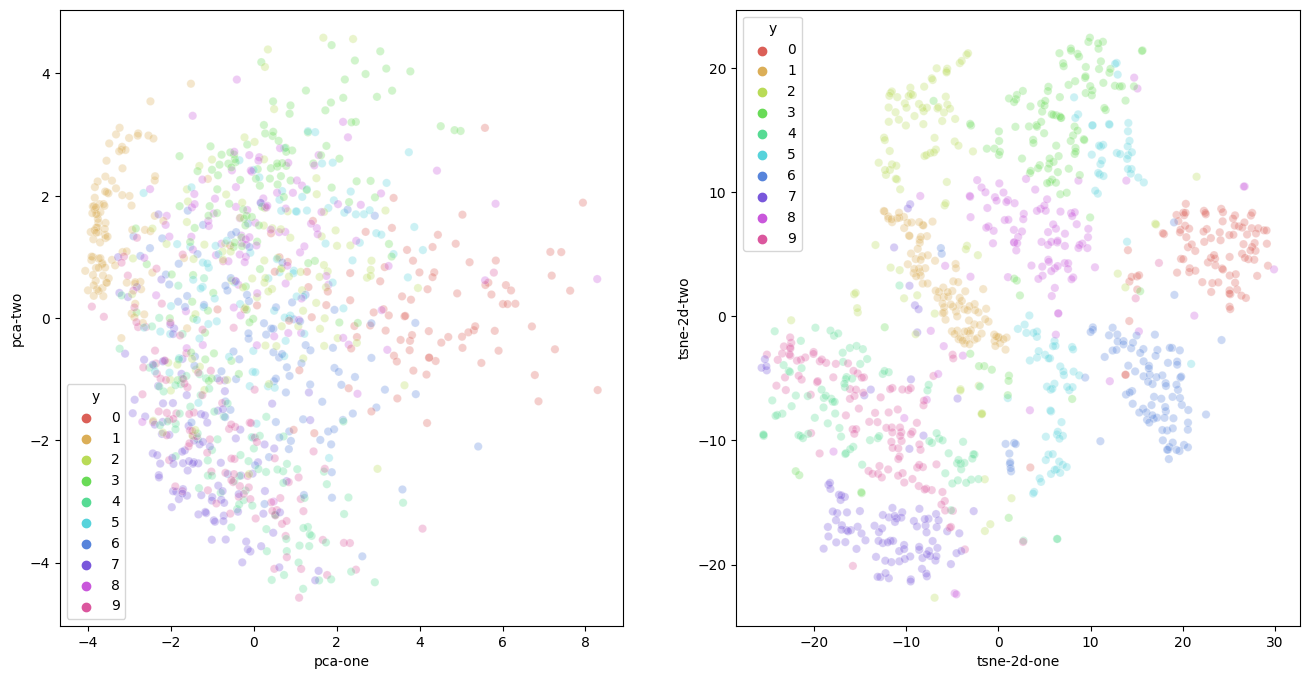

In [19]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    alpha=0.3,
    ax=ax1,
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    alpha=0.3,
    ax=ax2,
)

plt.show()

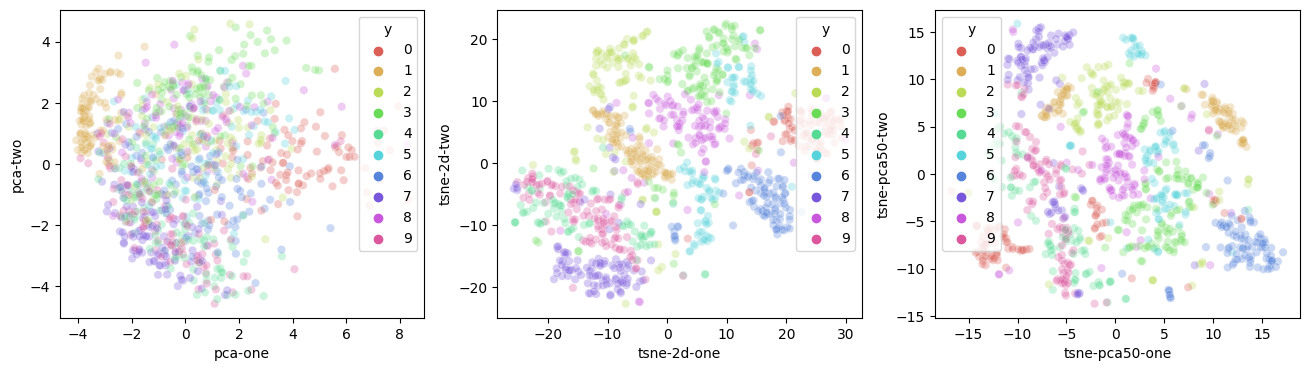

In [21]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
pc_values = np.arange(pca_50.n_components_) + 1
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, init='random', learning_rate=200)
tsne_pca_results = tsne.fit_transform(pca_result_50)
df_subset['tsne-pca50-one'] = tsne_pca_results[:, 0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:, 1]

my_palette = sns.color_palette('hls', 10)

plt.figure(figsize=(16, 4))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=my_palette,
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=my_palette,
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=my_palette,
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

plt.show()

In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
sns.set(context='notebook', style='white', rc={'figure.figsize':(14, 10)})

In [31]:
import umap.umap_ as umap


(1797, 64)


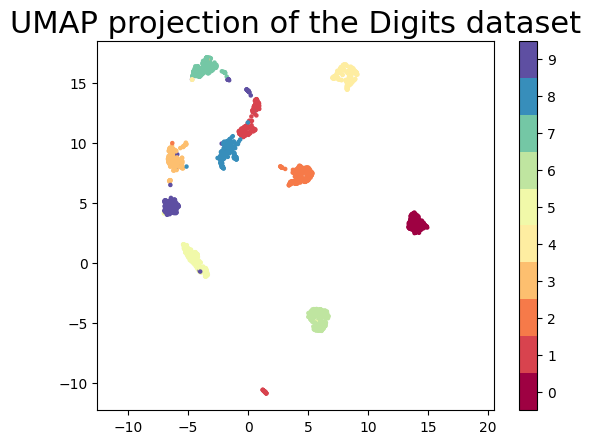

In [38]:
digits = load_digits()
print(digits.data.shape)
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=digits.target, 
            cmap='Spectral', 
            s=5)

plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=22)
plt.show()

(1000, 784)


/tmp/ipykernel_12364/3358784915.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=embedding[:, 0], y=embedding[:, 1], cmap="Spectral", s=5)


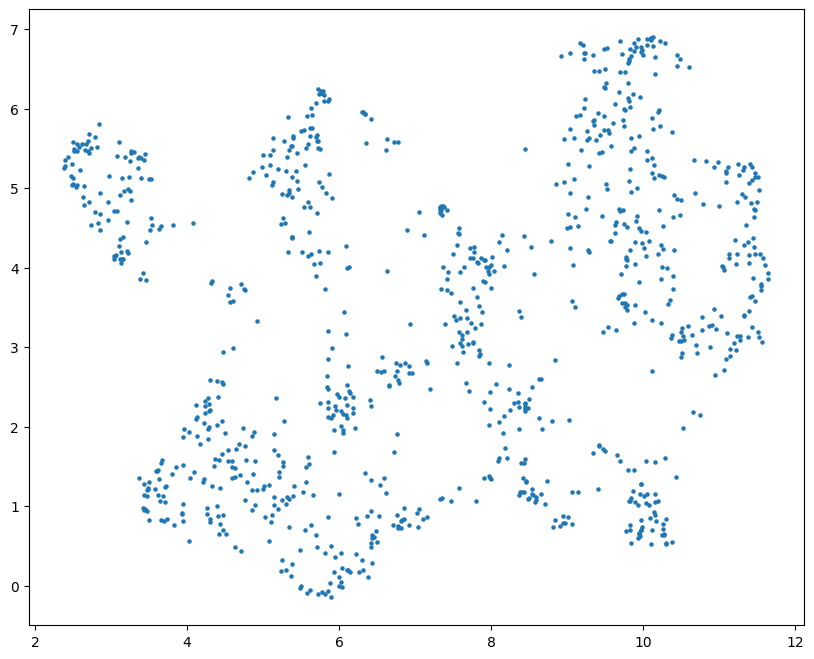

In [47]:
reducer = umap.UMAP(random_state=42)
reducer.fit(data_subset)
embedding = reducer.transform(data_subset)
embedding.shape

fig = plt.figure(figsize=(10,8))
plt.scatter(x=embedding[:, 0], y=embedding[:, 1], cmap="Spectral", s=5)
print(data_subset.shape)

In [48]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
import umap.umap_ as umap
sns.set(context='notebook', style='white', rc={'figure.figsize':(14, 10)})

In [ ]:
mnist = fetch_openml('mnist_784')

In [69]:
df = mnist.data / 255.0 # get pixels
y = mnist.target # get labels
feat_cols = df.columns #get name of columns before adding labels
df['y'] = y.cat.codes # merge

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 1000
mnist_subset = df.loc[rndperm[:N], :].copy() #use only a subset of samples
data_subset = mnist_subset[feat_cols].values


pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

mnist_subset['pca-one'] = pca_result[:, 0]
mnist_subset['pca-two'] = pca_result[:, 1] 
mnist_subset['pca-three'] = pca_result[:, 2]

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

mnist_subset['tsne-2d-one-p10'] = tsne_results[:, 0]
mnist_subset['tsne-2d-two-p10'] = tsne_results[:, 1]

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

mnist_subset['tsne-2d-one-p50'] = tsne_results[:, 0]
mnist_subset['tsne-2d-two-p50'] = tsne_results[:, 1]

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

mnist_subset['tsne-2d-one-p100'] = tsne_results[:, 0]
mnist_subset['tsne-2d-two-p100'] = tsne_results[:, 1]


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.024s...
[t-SNE] Computed neighbors for 1000 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.174763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.590218
[t-SNE] KL divergence after 300 iterations: 1.737890
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.924232
[t-SNE] KL divergence after 50 iterations with early exaggeration: 63.472134
[t-SNE] KL divergence after 300 iterations: 0.969649
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.201962
[t-SNE] KL divergence after 5

In [84]:
#reducer = umap.UMAP(random_state=42)
#reducer.fit(data_subset)
#embedding = reducer.transform(data_subset)

embedding = umap.UMAP(n_neighbors=5, random_state=42).fit(data_subset).transform(data_subset)

mnist_subset['umap0-n5'] = embedding[:, 0]
mnist_subset['umap1-n5'] = embedding[:, 1]

embedding = umap.UMAP(n_neighbors=30, random_state=42).fit(data_subset).transform(data_subset)

mnist_subset['umap0-n30'] = embedding[:, 0]
mnist_subset['umap1-n30'] = embedding[:, 1]

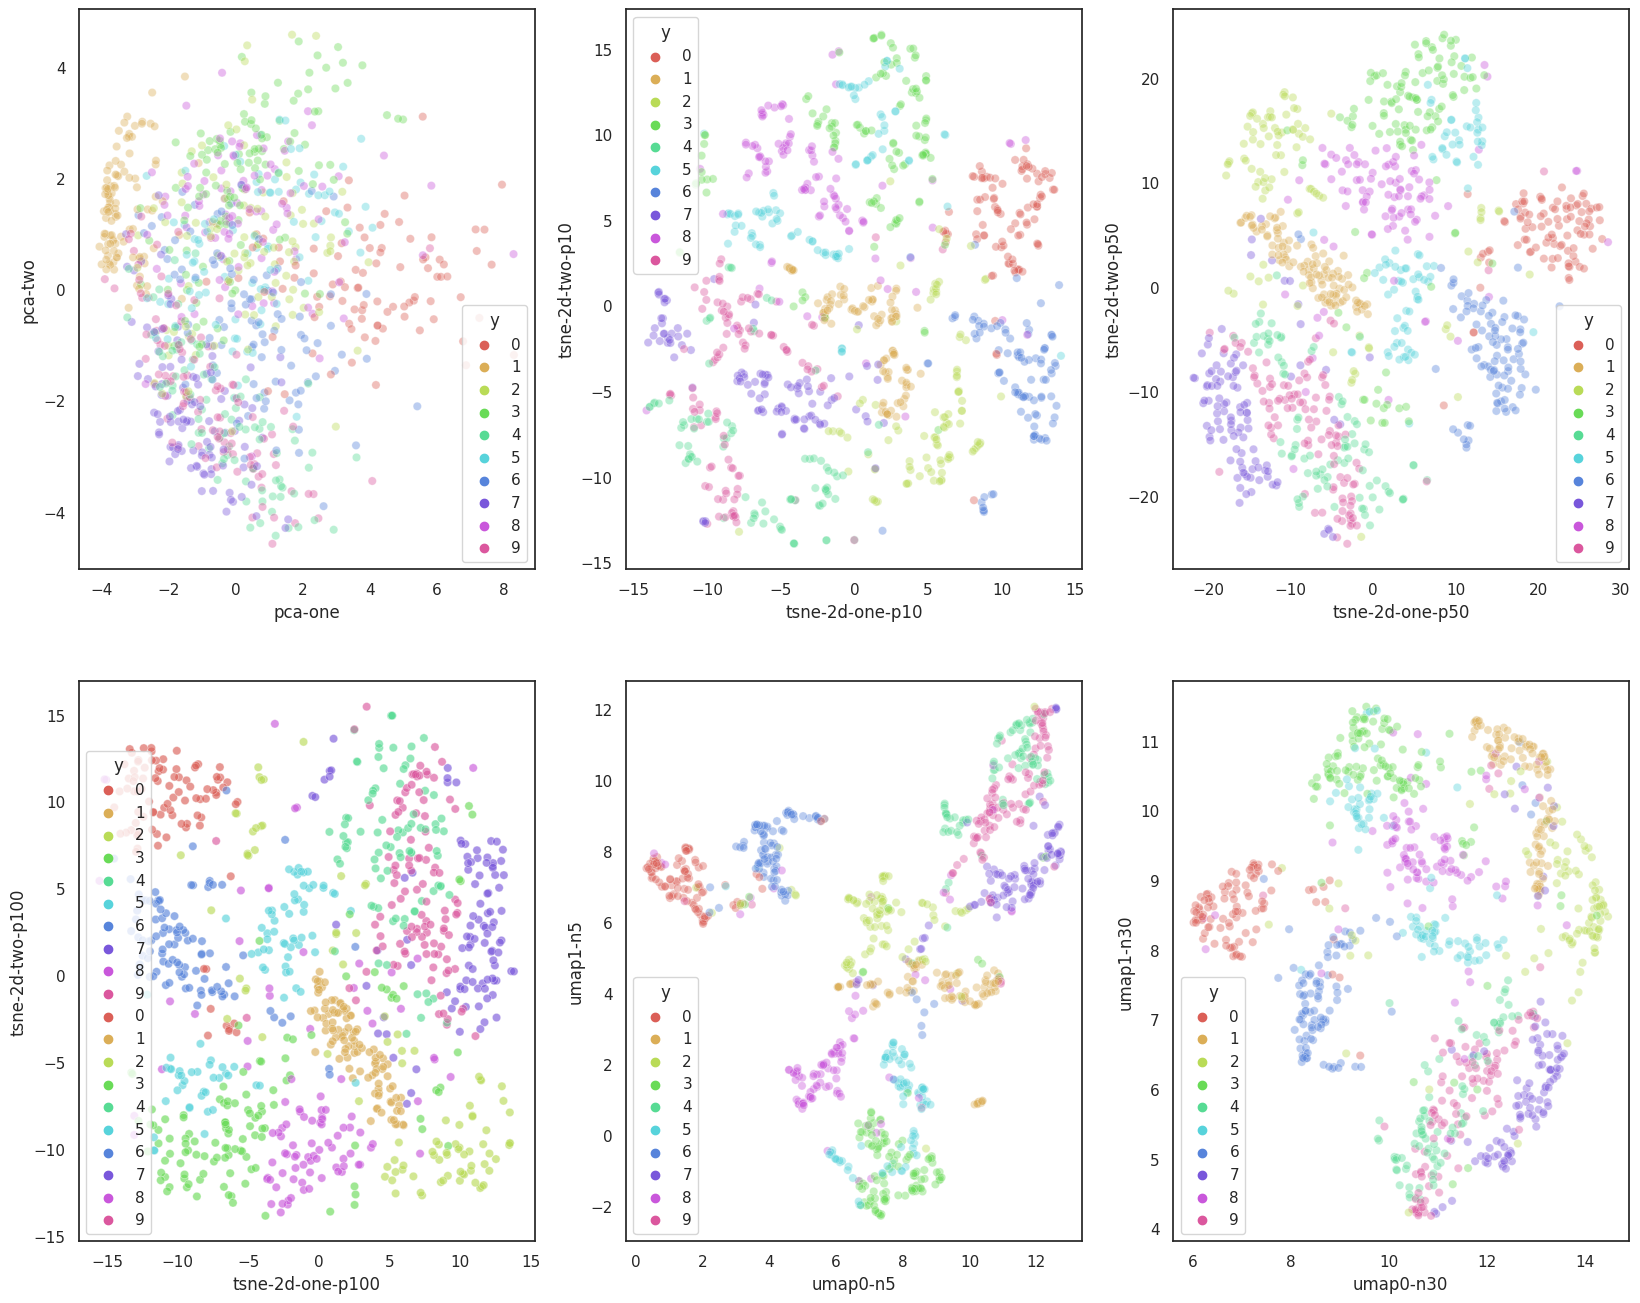

In [87]:
plt.figure(figsize=(20, 16))

ax1 = plt.subplot(2, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.4,
    ax=ax1
)

ax2 = plt.subplot(2, 3, 2)
sns.scatterplot(
    x="tsne-2d-one-p10", y="tsne-2d-two-p10",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.4,
    ax=ax2
)

ax3 = plt.subplot(2, 3, 3)
sns.scatterplot(
    x="tsne-2d-one-p50", y="tsne-2d-two-p50",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.4,
    ax=ax3
)


ax4 = plt.subplot(2, 3, 4)
sns.scatterplot(
    x="tsne-2d-one-p100", y="tsne-2d-two-p100",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.4,
    ax=ax4
)

ax4 = plt.subplot(2, 3, 4)
sns.scatterplot(
    x="tsne-2d-one-p100", y="tsne-2d-two-p100",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.4,
    ax=ax4
)

ax5 = plt.subplot(2, 3, 5)
sns.scatterplot(
    x="umap0-n5", y="umap1-n5",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_subset,
    legend="full",
    alpha=0.4,
    ax=ax5,

)


ax6 = plt.subplot(2, 3, 6)
sns.scatterplot(
    x="umap0-n30", y="umap1-n30",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=mnist_subset,
    legend="full",
    alpha=0.4,
    ax=ax6,

)

plt.show()
